In [1]:
from UTILITY_quickstart import *

In [2]:
#Start from the golden lattice, but with the injector reconfigured to the standard for 2024-10-22_oneBunch
importedDefaultSettings = loadConfig("setLattice_configs/2024-10-22_oneBunch_injectorOnly.yml")

importedDefaultSettings = importedDefaultSettings | {
    "centerBC14" : False,
    "centerBC20" : False,
    "centerMFFF" : False,
    "assertBC14Energy" : False,
    "assertBC20Energy" : False,
}

In [3]:
csrTF = False
evalElement = "PENT"
#evalElement = "BEGPDC"


inputBeamFilePathSuffix = importedDefaultSettings["inputBeamFilePathSuffix"]
bunchCount = importedDefaultSettings["bunchCount"]
tao = initializeTao(
    inputBeamFilePathSuffix = inputBeamFilePathSuffix,
    
    csrTF = csrTF,
    numMacroParticles=1e4,
    scratchPath = "/tmp",
    randomizeFileNames = True
)



Environment set to:  /Users/nmajik/Documents/SLAC/FACET2-Bmad-PyTao
Tracking to end
CSR off
Overwriting lattice with setLattice() defaults
No defaults file provided to setLattice(). Using setLattice_configs/defaults.yml
Number of macro particles = 10000.0
Beam created, written to /tmp/beams/activeBeamFile_9004636929296841276.h5, and reinit to tao


## Starting point

In [4]:
### Scan

-42


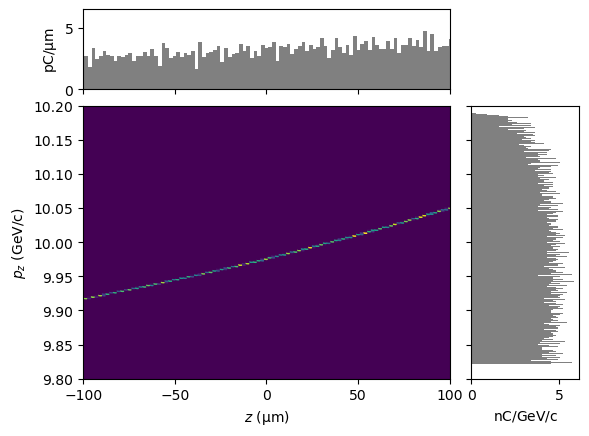

Slope: 6.412e+11
R²: 0.9782810021953353
-41


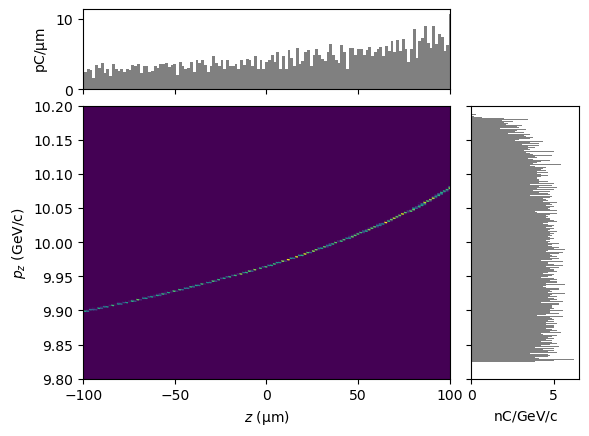

Slope: 8.251e+11
R²: 0.9359514313272044
-40


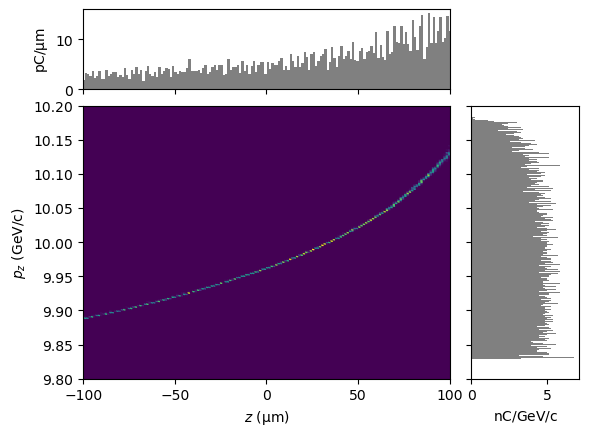

Slope: 9.892e+11
R²: 0.9191458083581892
-39


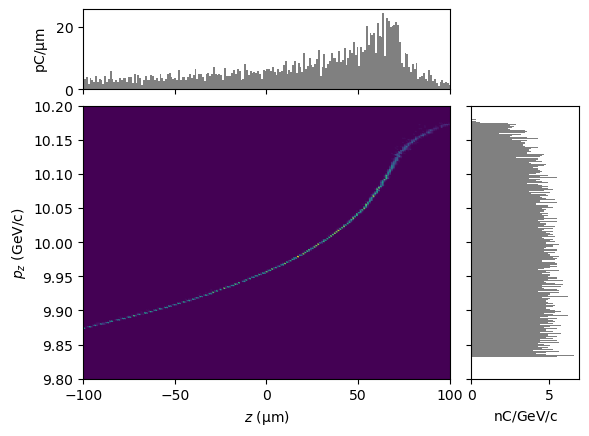

Slope: 1.232e+12
R²: 0.8895116385799935
-38


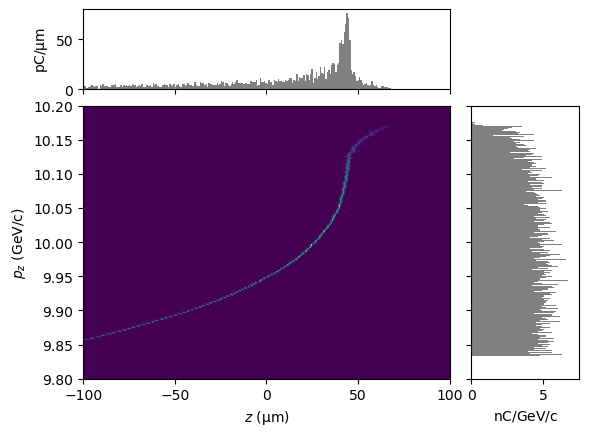

Slope: 1.610e+12
R²: 0.828876255932709
-37


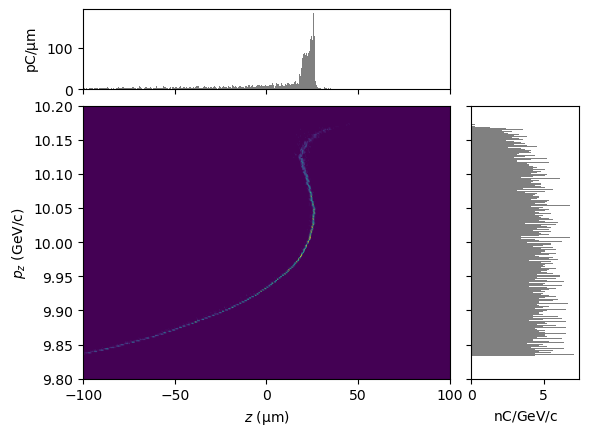

Slope: 2.186e+12
R²: 0.674594684426101
-36


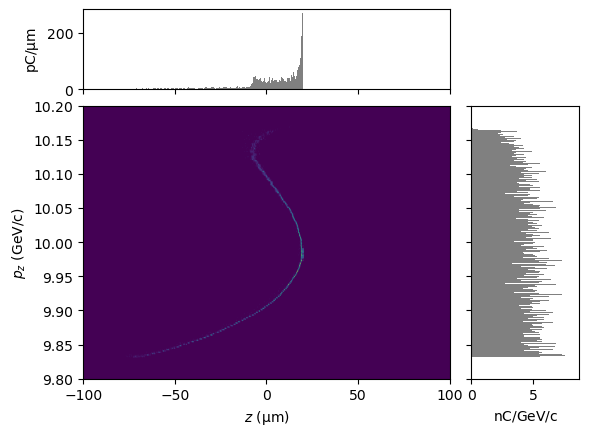

Slope: 2.126e+12
R²: 0.22644647580033245
-35


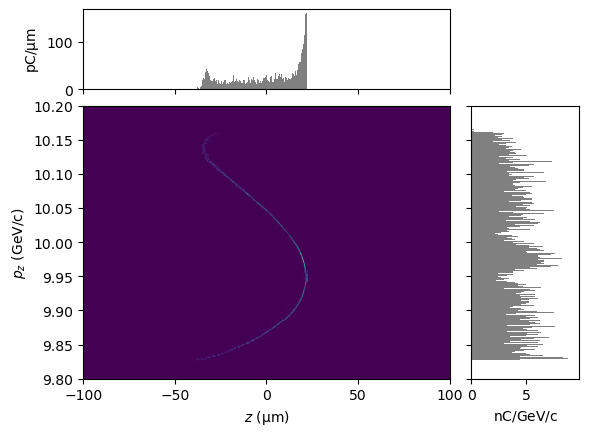

Slope: -2.090e+12
R²: 0.17763266406201517
-34


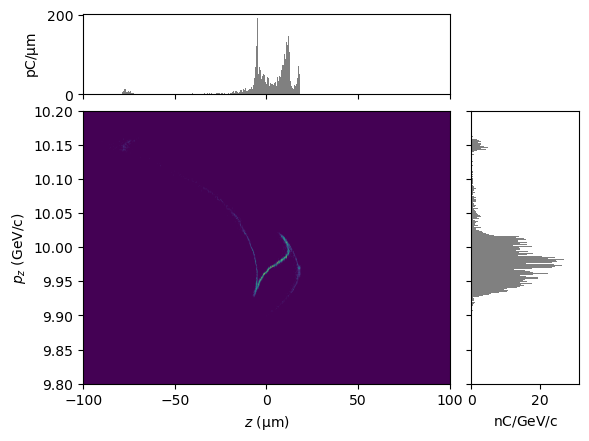

Slope: -1.621e+12
R²: 0.43215517424725974
-33


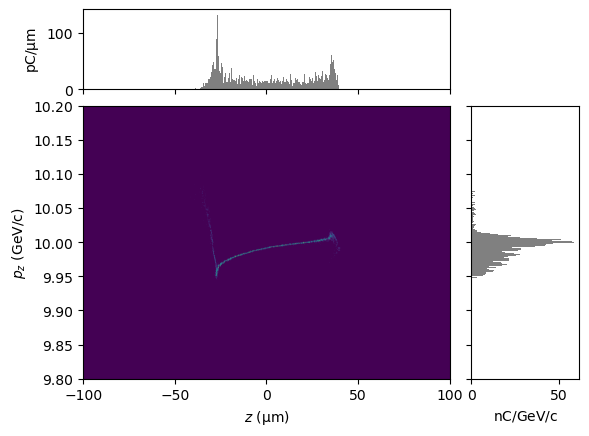

Slope: 3.328e+11
R²: 0.15756314379737926


<Figure size 640x480 with 0 Axes>

In [5]:
#Inherit starting point from centering-flags-on version "2025-04-04 BC20 hand tuning.ipynb"
#Then translated with "2025-04-04 Matching one bunch case with centering flags on vs off.ipynb"
 #Translation isn't perfect (for reasons I still don't understand... probably pointing since the LPS's up to BEGBC20 basically agree) so redoing phase scan

from scipy.stats import linregress

for L2PhaseSet in np.arange(-42, -32, 1):
    print(L2PhaseSet) 
    
    importedDefaultSettings = (importedDefaultSettings | {
        "L1PhaseSet" : -21.9, 
        "L1EnergyOffset": 0e6, 
        "L2PhaseSet" : L2PhaseSet,
        "L2EnergyOffset": 81e6, 
        "L3PhaseSet" : 2,
        "L3EnergyOffset": 80e6,
    } )

    
    setLattice(tao, **importedDefaultSettings)
    trackBeam(tao,  **importedDefaultSettings)
    
    P = getBeamAtElement(tao, "PENT")
    
    display(plotMod(P, 'z', 'pz', bins=300, xlim = (-100e-6, 100e-6), ylim = (9.8e9, 10.2e9) ) )
    #display(plotMod(P, 'z', 'pz', bins=300 ) )
    plt.clf()
    
    
    # Perform linear regression
    slope, intercept, r_value, p_value, std_err = linregress(P.z, P.energy)
    
    # r_value**2 is the R²
    r_squared = r_value**2
    
    print(f"Slope: {slope:.3e}")
    print(f"R²: {r_squared}")

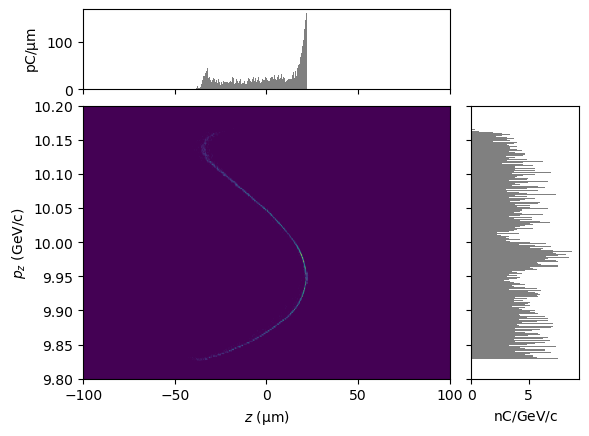

Slope: -2.091e+12
R²: 0.17774764612184923


In [6]:
importedDefaultSettings = (importedDefaultSettings | {
    "L1PhaseSet" : -21.9, 
    "L1EnergyOffset": 0e6, 
    "L2PhaseSet" : -35,
    "L2EnergyOffset": 81e6, 
    "L3PhaseSet" : 2,
    "L3EnergyOffset": 80e6,
} )

                           
setLattice(tao, **importedDefaultSettings)
trackBeam(tao,  **importedDefaultSettings)

P = getBeamAtElement(tao, "PENT")

display(plotMod(P, 'z', 'pz', bins=300, xlim = (-100e-6, 100e-6), ylim = (9.8e9, 10.2e9) ) )
plt.clf()


# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(P.z, P.energy)

# r_value**2 is the R²
r_squared = r_value**2

print(f"Slope: {slope:.3e}")
print(f"R²: {r_squared}")

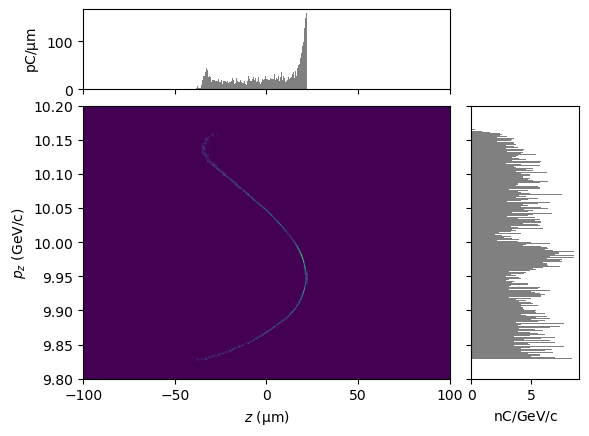

In [7]:
PStart = getBeamAtElement( tao, "BEGBC20" ) 

makeBeamActiveBeamFile(PStart, tao = tao)

trackBeam(tao, trackStart = "BEGBC20", **importedDefaultSettings)

P = getBeamAtElement(tao, "PENT")

display(plotMod(P, 'z', 'pz', bins=300, xlim = (-100e-6, 100e-6), ylim = (9.8e9, 10.2e9) ) )

## Hand tune

In [8]:
#Defaults:
# S1ELkG :  804.871
# S2ELkG :  -2049.489
# S3ELkG :  -1019.3230 

importedDefaultSettings["symmetricSextupoleStrengths"]

True

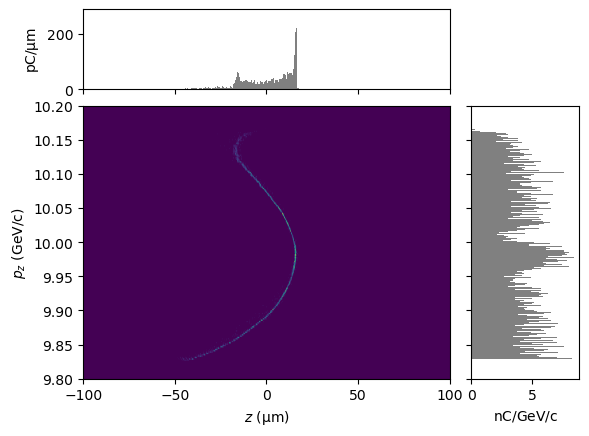

1.4594221783114544e-05
1.125804440404074e-05
1.1535532063898127e-05
1.0655632984200634e-05


In [11]:
#RMS optimized: 
#SI90 optimized: [ 2587.02748725 -2955.9719559  -2141.74217062]


setLattice(tao, **(importedDefaultSettings  | {
    "S1ELkG" : 2587, #800, #1300
    "S2ELkG" : -2955, #-2000,
    "S3ELkG" : -2141, #-2000
} ) )

trackBeam(tao, trackStart = "BEGBC20", **importedDefaultSettings)

P = getBeamAtElement(tao, "PENT")

display(plotMod(P, 'z', 'pz', bins=300, xlim = (-100e-6, 100e-6), ylim = (9.8e9, 10.2e9) ) )

print( P["sigma_z"] ) 
print( smallestIntervalImpliedSigma(P.z, percentage = 0.99) ) 
print( smallestIntervalImpliedSigma(P.z, percentage = 0.95) ) 
print( smallestIntervalImpliedSigma(P.z, percentage = 0.90) ) 

In [10]:
#Try using the actual RMS as the objective (instead of the typical SI90) to more agressively force it to fix the curve (RMS makes it "care" about the tails a lot)
def objective(params):
    S1ELkG, S2ELkG, S3ELkG = params
    
    setLattice(tao, **(importedDefaultSettings  | {
        "S1ELkG" : S1ELkG,
        "S2ELkG" : S2ELkG,
        "S3ELkG" : S3ELkG,
    } ) )

    try: 
        trackBeam(tao, trackStart = "BEGBC20", **importedDefaultSettings)
        
        P = getBeamAtElement(tao, "PENT")
    
        #error = P["sigma_z"]
        error = smallestIntervalImpliedSigma(P.z, percentage = 0.90)
    
        print( params, error ) 
        
        return error

    except:
        return 1e50

from scipy.optimize import minimize


# Perform optimization using Nelder-Mead
# result = minimize(
#     objective, 
#     [1000, -1000, -1000],# [1300, -2000, -1000], #Starting point
#     bounds = [(0,2590), (-21706,0), (-2625, 0)],
    
#     method='Nelder-Mead',
#     options={'adaptive': True}

#     # method = "COBYQA",
#     # options = {
#     #     "scale": True, 
#     #     #"initial_tr_radius": 1e-1, #1e-1
#     #     #"final_tr_radius": 1e-8, 
#     #     "disp": True } #"*_tr_radius" appears to constrain the scaled, not raw, variables (if scaling is enabled)
# )

from scipy.optimize import differential_evolution

result = differential_evolution(
    objective,
    bounds = [(0,2590), (-21706,0), (-2625, 0)]
)



print("Optimization Results:")
print(f"Optimal Parameters: {result.x}")
print(f"Objective Function Value at Optimal Parameters: {result.fun}")
print(f"Number of Iterations: {result.nit}")
print(f"Converged: {result.success}")

[  227.95787371 -2626.23564951  -846.9217587 ] 3.961614304881072e-05
[  745.07449631 -6572.19341273 -2175.13932858] 3.8403220171171955e-05
[   986.83570453 -11789.18465332    -38.87422897] 3.283406925743665e-05
[  1656.70724534 -12196.78286394  -1592.41307037] 3.344492725384898e-05
[  591.92261122  -220.48700766 -2476.24080281] 1.5483377807244867e-05
[ 2442.08232926 -4587.8091111  -2071.50787004] 3.500127853746762e-05
[  805.4219716  -3475.06894328  -758.0572925 ] 4.444888383283991e-05
[  493.61854791 -7851.81593191 -1644.3095288 ] 3.5725052662426165e-05
[  1515.58488764 -15527.13270226  -1057.77561516] 3.1744380868863255e-05
[ 2087.71122021 -9579.58358081 -1000.65308064] 3.667394236944502e-05
[   541.51205997 -16661.98906145  -1483.26961355] 3.028022165172185e-05
[ 1749.03158537 -2256.13171073 -1718.17632249] 1.1271098827853364e-05
[  2271.98566609 -18573.32996786   -144.01953531] 3.063992953040018e-05
[2210.95234608 -498.84737718 -426.81561467] 2.8333330874043656e-05
[  1453.41903373